# Text Data Processing

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ml_course/Project/Data/data_prioritized.csv')
df.head()

,Issue,Sub-issue,Consumer complaint narrative,Priority
0,Managing an account,Funds not handled or disbursed as instructed,The Claim No. assigned by Citibank : XXXX On X...,High
1,Problem with a lender or other company chargin...,Transaction was not authorized,I logged into my account today and Td Bank che...,High
2,Opening an account,Account opened as a result of fraud,"Hi, I received an email from Chime in XX/XX/20...",High
3,Managing an account,Funds not handled or disbursed as instructed,Truist Bank allowed fraudulent XXXX transactio...,High
4,Managing an account,Problem making or receiving payments,Making payment via XXXX and found out it was a...,High


In [ ]:
df.describe()

,Issue,Sub-issue,Consumer complaint narrative,Priority
count,51951,51951,51951,51951
unique,10,32,51891,3
top,Managing an account,Deposits and withdrawals,My name is XXXX XXXX and I 'm a victim of Iden...,High
freq,28711,8774,8,22670


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51951 entries, 0 to 51950
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Issue                         51951 non-null  object
 1   Sub-issue                     51951 non-null  object
 2   Consumer complaint narrative  51951 non-null  object
 3   Priority                      51951 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


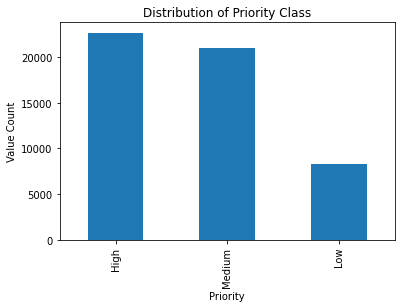

In [ ]:
df.Priority.value_counts().plot(kind='bar')
plt.xlabel('Priority')
plt.ylabel('Value Count')
plt.title('Distribution of Priority Class')
plt.show()

In [ ]:
re.sub('[X\/]+', '', df['Consumer complaint narrative'][0])

'The Claim No. assigned by Citibank :  On . , hacker sent a message on top of Citibank \'s login page, stating that he was from Citibank, and told me that " some suspicious activity occurred on your account, please call  \'\' ... Then the Hacker sent wire transfer instructions to Citibank wire out {$49000.00} without my consent and knowledge. My request for refund was denied by Citibank \'s Fraud Prevention by a form letter, dated . This letter stating that the dispute was declined. There was no signature, no supporting documentation to substantiate this decline. \n\nAccording to the Client Manual Consumer Accounts of Citibank, Effective . This 53-page manual was published by Citibank and mentioned in your form letter of denial dated . Under page 19, of the manual, section of Security Procedures wherein states, I quote When you place an order for a funds transfer, we will follow a security procedure established for your protection and ours to verify that the transfer has been properly 

In [ ]:
df_filter = df.copy(deep=True)

In [ ]:
df_filter['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: re.sub('[X\/]+', '', x))

In [ ]:
df_filter['Consumer complaint narrative'][100]

'Several days now I can log in online or mobile but when I tap or click the personal checking account - it takes me to a blank screen, I have not been able to view my account activity, and the bank rep have not been able to help.'

In [ ]:
exmp = 'He Went and spent 100$ yesterday'
doc = nlp(exmp)
for token in doc.ents:
    print(token.text, token.label_)

100$ MONEY
yesterday DATE


## Preprocessing Using SpaCy

In [ ]:
def process_text(text):
    tokenized_list = []
    tokenized_text = nlp(text)
    named_entities = [token.text for token in tokenized_text.ents]
    for token in tokenized_text:
        if token.is_punct or token.is_space or token.is_stop:
            continue
        elif token.is_currency or token.is_digit or token.text in named_entities:
            continue
        tokenized_list.append(token.lemma_.lower())
    return ' '.join(tokenized_list)

In [ ]:
process_text(df_filter['Consumer complaint narrative'][0])

'claim assign hacker send message login page state tell suspicious activity occur account send wire transfer instruction wire consent knowledge request refund deny fraud prevention form letter date letter state dispute decline signature support documentation substantiate decline accord client manual consumer accounts effective page manual publish mention form letter denial date page manual section security procedures state quote place order fund transfer follow security procedure establish protection verify transfer properly authorize understand security procedure design verify source fund transfer instruction detect error content instruction prevent duplicate transfer procedure depend mean provide instruction agree security procedure agree confirm authenticity content instruction place authorized signer account place transfer order agree use applicable security procedure agree bind fund transfer request receive verifie accordance security procedure outline unquote base citibank manual

In [ ]:
df_filter['processed_text'] = df_filter['Consumer complaint narrative'].apply(process_text)

In [ ]:
df_filter['processed_text'][0]

'claim assign hacker send message login page state tell suspicious activity occur account send wire transfer instruction wire consent knowledge request refund deny fraud prevention form letter date letter state dispute decline signature support documentation substantiate decline accord client manual consumer accounts effective page manual publish mention form letter denial date page manual section security procedures state quote place order fund transfer follow security procedure establish protection verify transfer properly authorize understand security procedure design verify source fund transfer instruction detect error content instruction prevent duplicate transfer procedure depend mean provide instruction agree security procedure agree confirm authenticity content instruction place authorized signer account place transfer order agree use applicable security procedure agree bind fund transfer request receive verifie accordance security procedure outline unquote base citibank manual

In [ ]:
df_filter['processed_text'][3]

'bank allow fraudulent transaction account notify email phone notification authorize transaction repeatedly explain authorize transaction claim allow criminal drain checking account financial aid refund need pay school supply current fund account frozen student unable afford basic necessity live pay require bill leave absence school allow government fund loan steal face homelessness negligence bank expand fact allow criminal able transfer fund exceed transfer example negligence go branch speak bank teller reassure fund return account current pende fraudulent transaction post lie block account allow fraudulent transaction lack care empathy give entrust money bank unacceptable entire claim process extremely unprofessional quickly deny claim thorough investigation sincerely hope complaint help achieve justice financial aid refund steal ability attend school'

In [ ]:
df_filter['processed_text'][15]

'run promotion past year certain amount priority saving checking account pay day condition money new attempt advantage offer twice time unsuccessfully initially apply online approve account instantly day later receive say miss documentation proof d. provide passport reject eventually tell passport acceptable account open online branch complete process say wish proceed mind passport qualify id tell close account account fund mind refuse honor document open attempt apply online passport time issue whatsoever account open fund offer require start keep inquire bonus time getting tell credit eventually contact tell eligible bonus account previously reference account refuse acknowledge lack documentation fund explain situation customer service rep escalate case research department response brief previous checking account open epic failure time refuse accept passport d accept issue time refuse honor offer fact allow use pretty dismal handle initial account opening build future failure way emp

In [ ]:
df_filter['processed_text'].loc[df_filter['Priority']=='Low'].iloc[34]

'open bank small business checking account sole proprietor term bonus state new deposit s new money deposit direct mobile day account opening maintain balance day account opening receive deposit money new bank bank account money having deposit day account question end day despite meet term bonus receive contact bank tell customer require deposit eligible source day time frame disclosure new deposit s new money deposit direct mobile day account opening maintain balance day account opening despite complaint patently false bank refuse offer response allow simply disregard term promotion attempt gin new account false advertising deceptive malicious practice particularly dangerous come banking'

### Saving Processed Data

In [ ]:
df_filter.to_csv('/content/drive/MyDrive/Ml_course/Project/Data/processed_data.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
df_filter = pd.read_csv('/content/drive/MyDrive/Ml_course/Project/Data/processed_data.csv')
df_filter.head()

,Issue,Sub-issue,Consumer complaint narrative,Priority,processed_text
0,Managing an account,Funds not handled or disbursed as instructed,"The Claim No. assigned by Citibank : On . , h...",High,claim assign hacker send message login page st...
1,Problem with a lender or other company chargin...,Transaction was not authorized,I logged into my account today and Td Bank che...,High,log account td bank check old account charge n...
2,Opening an account,Account opened as a result of fraud,"Hi, I received an email from Chime in 2021 abo...",High,hi receive email chime debit card send address...
3,Managing an account,Funds not handled or disbursed as instructed,Truist Bank allowed fraudulent transactions o...,High,bank allow fraudulent transaction account noti...
4,Managing an account,Problem making or receiving payments,Making payment via and found out it was a sca...,High,make payment find scam bank want help reverse ...


In [ ]:
df_filter.loc[df_filter['processed_text'].isnull() == True]

,Issue,Sub-issue,Consumer complaint narrative,Priority,processed_text
28136,Opening an account,Account opened as a result of fraud,&,High,NaN


In [ ]:
df_filter.dropna(inplace=True)

In [ ]:
df_filter.isna().sum()

Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Priority                        0
processed_text                  0
dtype: int64

In [ ]:
from wordcloud import WordCloud

In [ ]:
def get_grouped_text(priority_value):
    priority_data = df_filter['processed_text'].loc[df_filter['Priority']==priority_value].values
    priority_string = " ".join(priority_data)
    return priority_string

In [ ]:
def generate_word_cloud(title, priority_val):
    text_data = get_grouped_text(priority_val)
    word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text_data)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(title, pad=18, fontsize=16)
    plt.axis("off")
    plt.show()

## Word Distribution

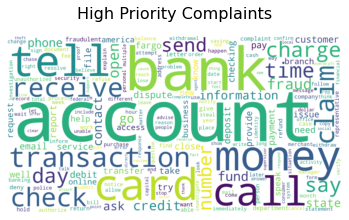

In [ ]:
generate_word_cloud(title='High Priority Complaints', priority_val='High')

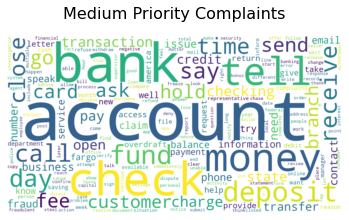

In [ ]:
generate_word_cloud(title='Medium Priority Complaints', priority_val='Medium')

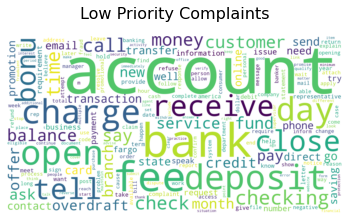

In [ ]:
generate_word_cloud(title='Low Priority Complaints', priority_val='Low')

In [ ]:
nlp.vocab['bank'].is_stop = True

In [ ]:
eg_doc = nlp('He went to the bank')
for token in eg_doc:
    print(token.text, token.is_stop)

He True
went False
to True
the True
bank True


## Final Processing

In [ ]:
nlp.vocab['account'].is_stop = True

In [ ]:
def new_preprocess(text):
    processed_list = []
    doc = nlp(text)
    for token in doc:
        if token.is_stop:
            continue
        processed_list.append(token.text)
    if len(processed_list) < 4:
        return np.nan
    return " ".join(processed_list)

In [ ]:
new_preprocess(df_filter['processed_text'][0])

'claim assign hacker send message login page state tell suspicious activity occur send wire transfer instruction wire consent knowledge request refund deny fraud prevention form letter date letter state dispute decline signature support documentation substantiate decline accord client manual consumer accounts effective page manual publish mention form letter denial date page manual section security procedures state quote place order fund transfer follow security procedure establish protection verify transfer properly authorize understand security procedure design verify source fund transfer instruction detect error content instruction prevent duplicate transfer procedure depend mean provide instruction agree security procedure agree confirm authenticity content instruction place authorized signer place transfer order agree use applicable security procedure agree bind fund transfer request receive verifie accordance security procedure outline unquote base citibank manualstatement appare

In [ ]:
df_filter['new_processed'] = df_filter['processed_text'].apply(new_preprocess)

In [ ]:
df_filter.head()

,Issue,Sub-issue,Consumer complaint narrative,Priority,processed_text,new_processed
0,Managing an account,Funds not handled or disbursed as instructed,"The Claim No. assigned by Citibank : On . , h...",High,claim assign hacker send message login page st...,claim assign hacker send message login page st...
1,Problem with a lender or other company chargin...,Transaction was not authorized,I logged into my account today and Td Bank che...,High,log account td bank check old account charge n...,log td check old charge able money cash money ...
2,Opening an account,Account opened as a result of fraud,"Hi, I received an email from Chime in 2021 abo...",High,hi receive email chime debit card send address...,hi receive email chime debit card send address...
3,Managing an account,Funds not handled or disbursed as instructed,Truist Bank allowed fraudulent transactions o...,High,bank allow fraudulent transaction account noti...,allow fraudulent transaction notify email phon...
4,Managing an account,Problem making or receiving payments,Making payment via and found out it was a sca...,High,make payment find scam bank want help reverse ...,payment find scam want help reverse payment tr...


In [ ]:
df_filter.isnull().sum()

Issue                             0
Sub-issue                         0
Consumer complaint narrative      0
Priority                          0
processed_text                    0
new_processed                   359
dtype: int64

In [ ]:
df_filter.loc[df_filter['new_processed'].isnull() == True]

,Issue,Sub-issue,Consumer complaint narrative,Priority,processed_text,new_processed
331,Managing an account,Problem using a debit or ATM card,Bank of America charged me DebitHold,High,bank america charge debithold,NaN
447,Opening an account,Unable to open an account,report to chexsystems 2019 it was in maryla...,High,report chexsystem live,NaN
550,Managing an account,Deposits and withdrawals,My account is frozen,Medium,account freeze,NaN
721,Opening an account,Account opened as a result of fraud,Somebody opened bank accounts with my identifi...,High,somebody open bank account identification,NaN
1002,Managing an account,Problem using a debit or ATM card,There are {$310.00} and {$21.00} transactions ...,High,transaction recognize,NaN
...,...,...,...,...,...,...
51776,Closing an account,Fees charged for closing account,i close my account cause my the bank was takin...,Low,close account cause bank take money,NaN
51816,Opening an account,Unable to open an account,I cant able to link my bank account in it.,High,not able link bank account,NaN
51819,Managing an account,Deposits and withdrawals,I need help on adding my bank account on,Medium,need help add bank account,NaN
51821,Managing an account,Funds not handled or disbursed as instructed,can not transfer to my account,High,transfer account,NaN


In [ ]:
df_filter.to_csv('/content/drive/MyDrive/Ml_course/Project/Data/processed_new.csv', index=False)

In [ ]:
df_filter.shape

(51950, 6)

************************************************